Image loaded successfully.


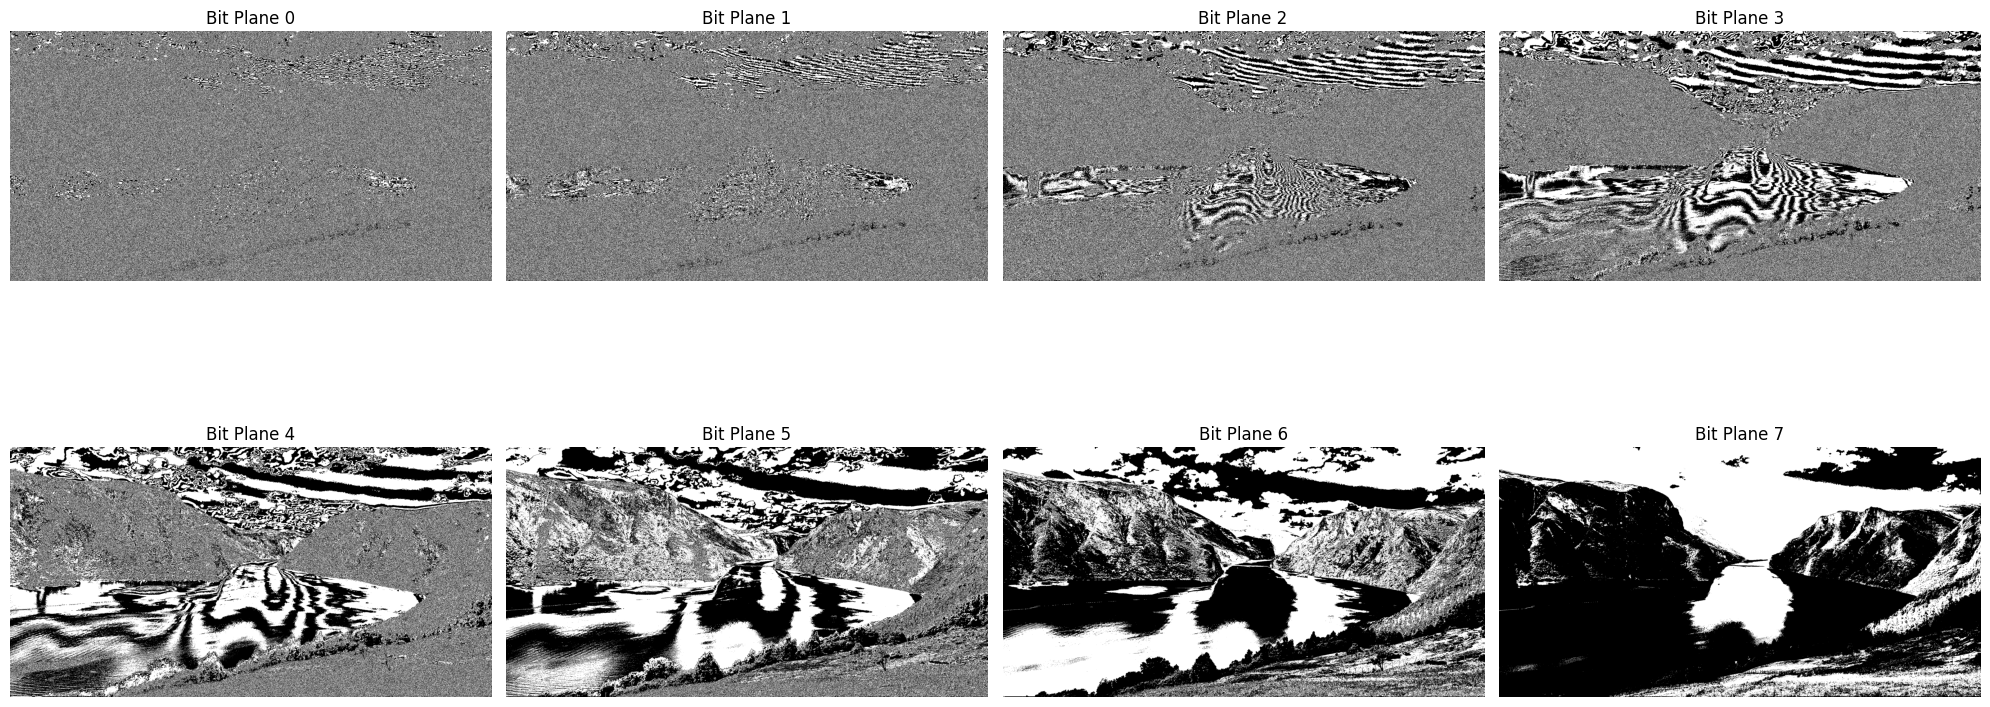

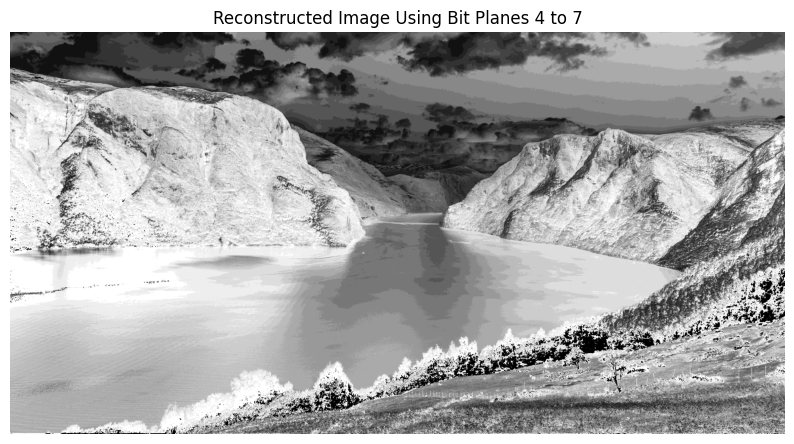

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('/content/scene.jpeg', cv2.IMREAD_GRAYSCALE)

# Verify if the image was loaded properly
if img is None:
    print("Failed to load the image.")
else:
    print("Image loaded successfully.")

# Create a list to hold the bit planes
bit_planes = []

# Extract and store each of the 8 bit planes
for bit in range(8):
    # Create an array for the bit plane
    bit_plane = np.zeros_like(img)

    # Isolate the bit plane using bitwise operations
    bit_plane = cv2.bitwise_and(img, 1 << bit)

    # Convert non-zero elements to 255 for visualization
    bit_plane = np.where(bit_plane > 0, 255, 0).astype(np.uint8)

    # Append the bit plane to the list
    bit_planes.append(bit_plane)

# Display the 8 bit planes in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()  # Flatten the array of axes

for bit in range(8):
    axes[bit].imshow(bit_planes[bit], cmap='gray')
    axes[bit].set_title(f'Bit Plane {bit}')
    axes[bit].axis('off')  # Remove axis ticks

plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Reconstruct the image using the higher bit planes (4 to 7)
reconstructed_img = np.zeros_like(img)

for bit in range(4, 8):
    # Reconstruct the image by summing the weighted bit planes
    reconstructed_img += bit_planes[bit] * (1 << bit)

# Display the reconstructed image
plt.figure(figsize=(10, 7))
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image Using Bit Planes 4 to 7')
plt.axis('off')
plt.show()
